# FRAUD TRANSACTION DETECTION

In [2]:
from IPython import display

In [4]:
from IPython.display import Image

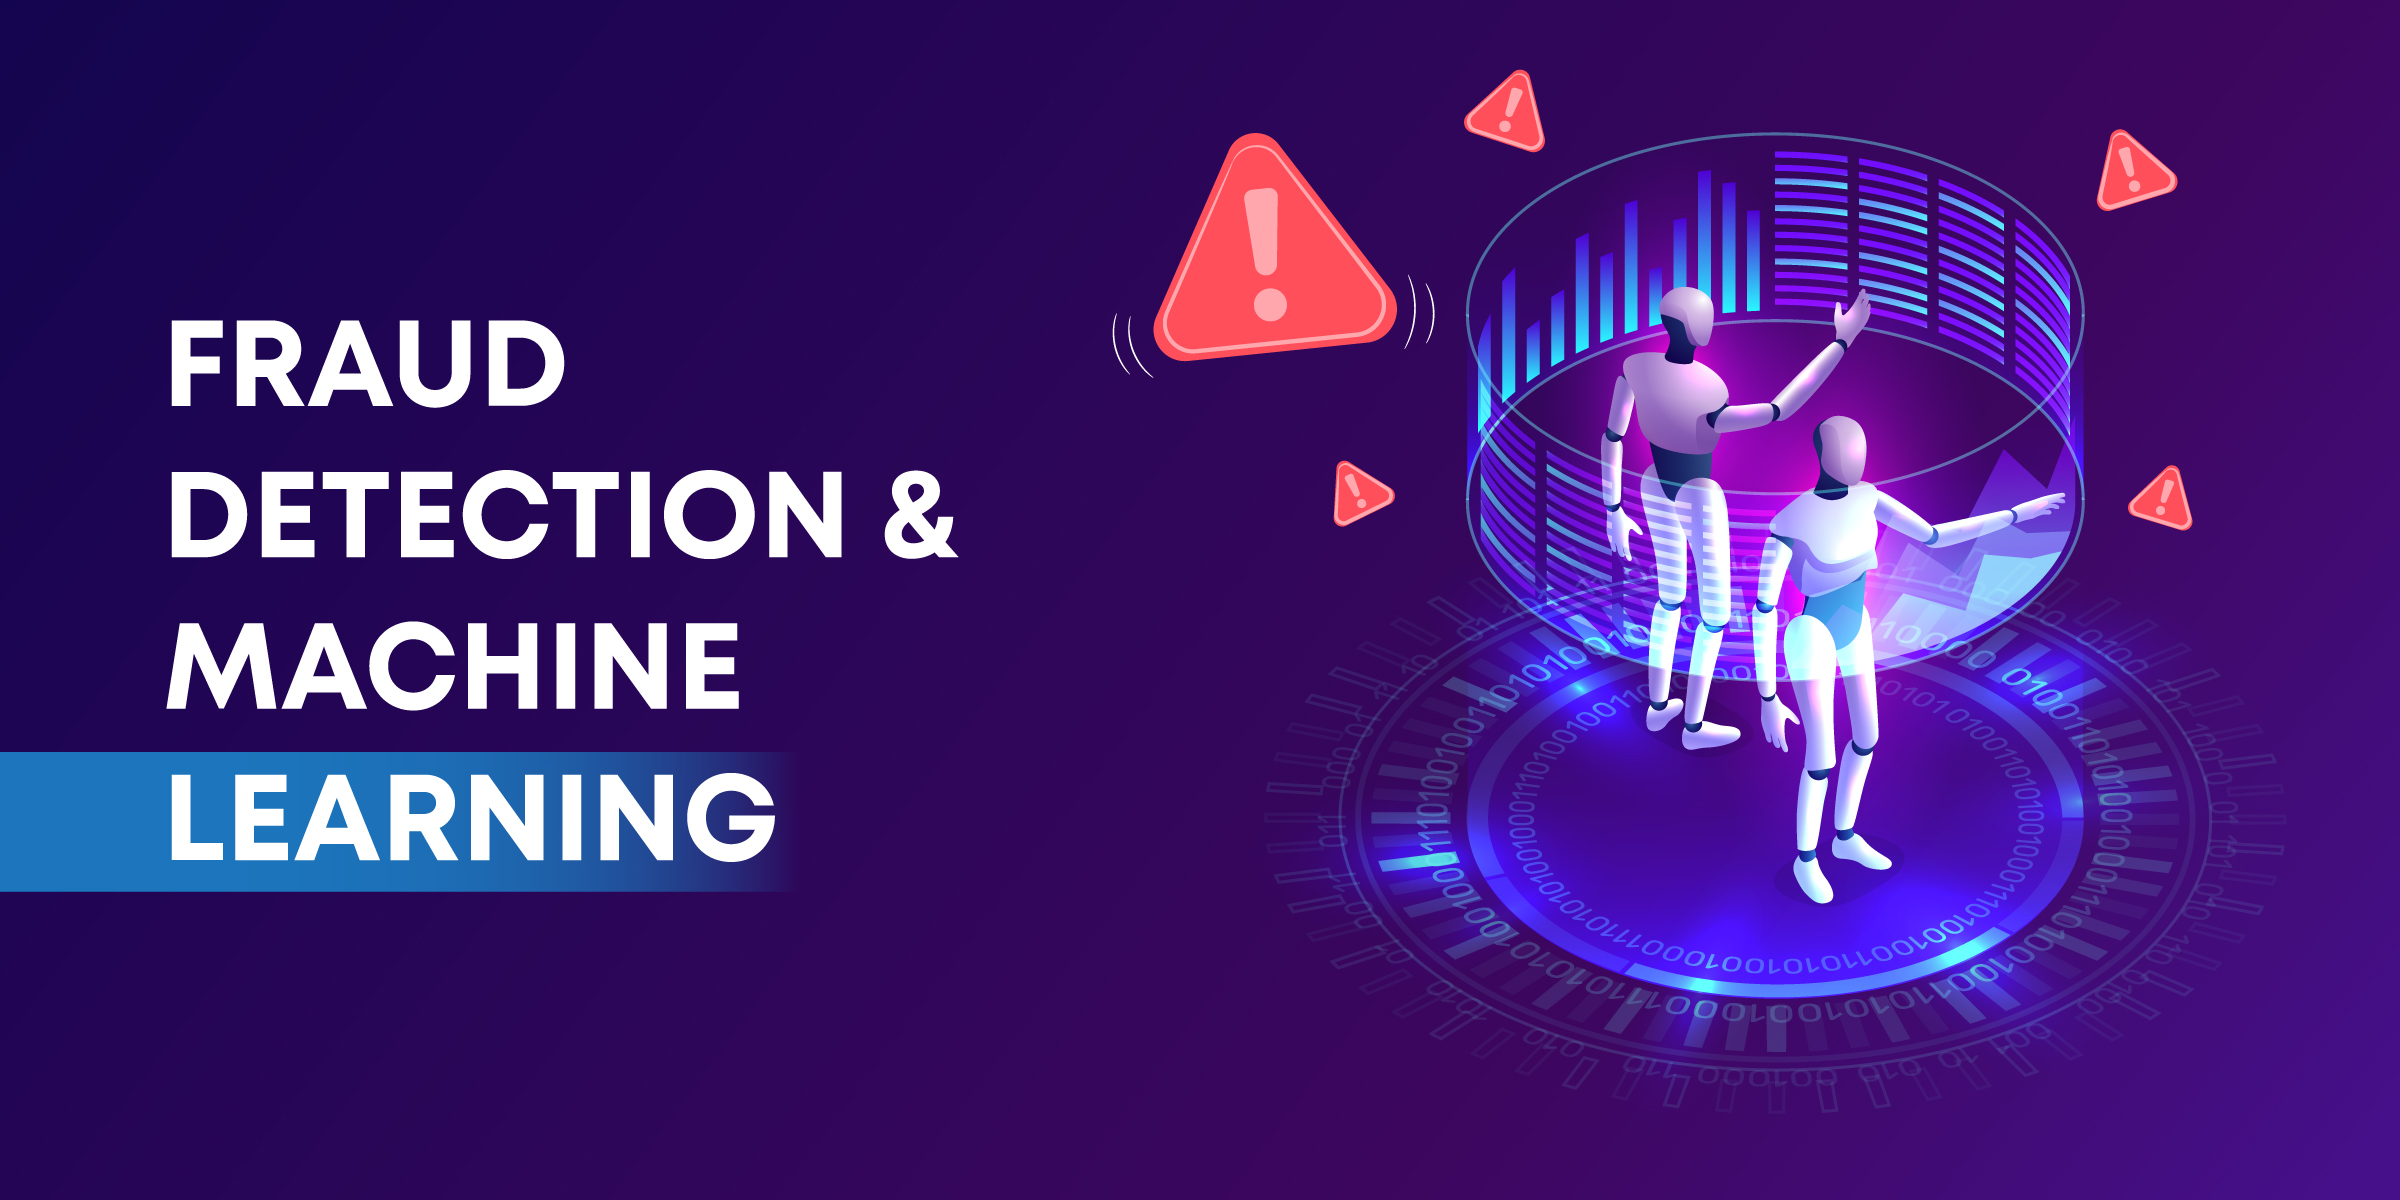

In [6]:
Image(filename='C:\\Users\\Admin\\Downloads\\Fraud-Detection-Machine-Learning.jpg')

### 1. Business Understanding <br> 2. Data Understanding <br> 3. Data Cleaning & Preprocessing <br> 4. EDA(Exploratory Data Analysis) <br> 5. Model Selection <br> 6. Model Evaluation & Accuracy <br> 7. Model Deployment <br> 8. Reporting & Dashboarding

# Business Understanding & Problem Statement

Financial fraud is a significant and growing problem for financial institutions worldwide, leading to substantial monetary losses, reputational damage, and diminished customer trust. The primary challenge lies in identifying fraudulent transactions accurately and swiftly amidst a vast volume of legitimate transactions, which requires a sophisticated and scalable solution

Create a machine learning model that can accurately predict fraudulent transactions

# Data Understanding

In this Datasets, There are 1048575 Rows and 11 Columns

### Import Python Library

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [17]:
fraud = pd.read_csv('https://raw.githubusercontent.com/OmamaImran/Transaction-Fraud-Detection-Model/master/Fraud.csv')

In [19]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
fraud.shape

(1048575, 11)

# Data Cleaning & Preprocessing

### Descriptive Stastistics

In [25]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [27]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


### Identifying Missing Values

In [29]:
# There is not any missing value in this Data
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### (fraud_2) New DataFrame

In [32]:
fraud_2 = fraud.copy()

In [34]:
fraud_2.drop(columns='isFlaggedFraud',inplace=True)

In [38]:
fraud_2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Identifying the Outliers

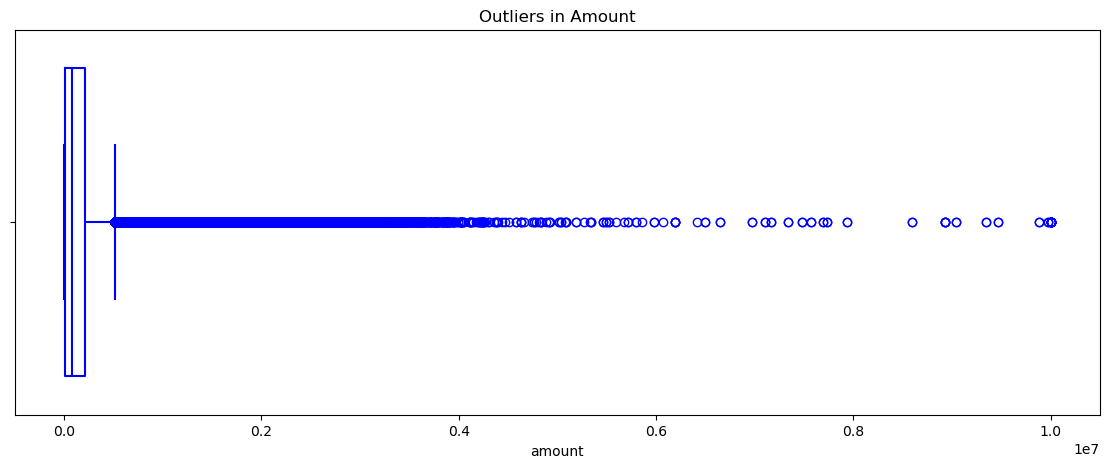

In [41]:
plt.figure(figsize=(14,5))
sns.boxplot(data=fraud_2,x=fraud_2['amount'],fill=False,color='blue')
plt.title('Outliers in Amount')
plt.show()

### Outliers Detected By IQR Method

an outlier is a data point that significantly differs from the other data points in the set. Outliers can be unusually high or low compared to the rest of the data. They are often identified by their deviation from the typical pattern or distribution of the data.

In [43]:
Q1 = fraud_2['amount'].quantile(0.25)
Q1

12149.065

In [45]:
Q3 = fraud_2['amount'].quantile(0.75)
Q3

213761.89

In [47]:
IQR = Q3-Q1
IQR

201612.825

In [49]:
lower_bound = Q1-1.5*IQR
lower_bound

-290270.17250000004

In [51]:
upper_bound = Q3+1.5*IQR
upper_bound

516181.12750000006

In [53]:
outliers = fraud_2[(fraud_2['amount'] < lower_bound) | (fraud_2['amount'] > upper_bound)]

In [55]:
# There are 53088 Datapoints are in Outliers of this Datasets
outliers.shape

(53088, 10)

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
outliers.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
85,1,TRANSFER,1505626.01,C926859124,0.0,0.0,C665576141,29031.00,5515763.34,0
86,1,TRANSFER,554026.99,C1603696865,0.0,0.0,C766572210,579285.56,0.00,0
88,1,TRANSFER,761507.39,C412788346,0.0,0.0,C1590550415,1280036.23,19200000.00,0
89,1,TRANSFER,1429051.47,C1520267010,0.0,0.0,C1590550415,2041543.62,19200000.00,0
93,1,TRANSFER,583848.46,C1839168128,0.0,0.0,C1286084959,667778.00,2107778.11,0


# EDA (Exploratory Data Analysis)

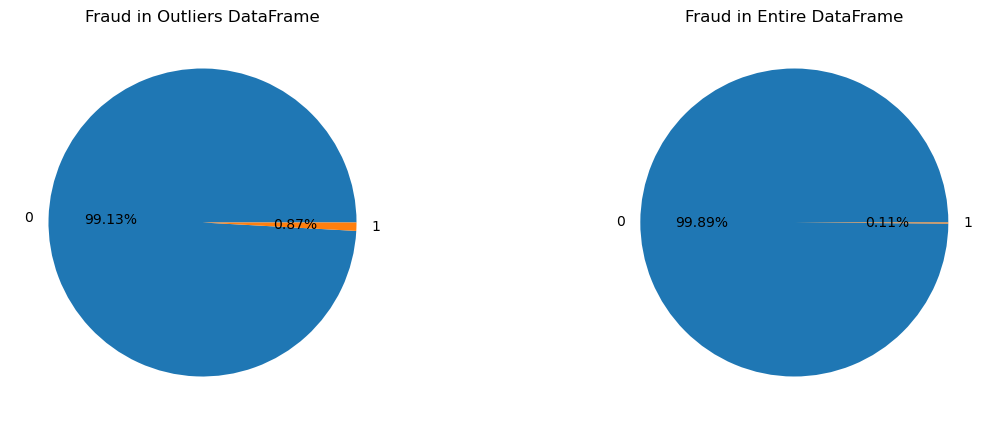

In [62]:
# There are around 40% of fraud in present in outliers dataframe of entire fraud in this datasets

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(x=outliers['isFraud'].value_counts(),autopct='%1.2f%%',labels=outliers['isFraud'].value_counts().index)
plt.title('Fraud in Outliers DataFrame')
plt.subplot(1,2,2)
plt.pie(x=fraud_2['isFraud'].value_counts(),autopct='%1.2f%%',labels=fraud_2['isFraud'].value_counts().index)
plt.title('Fraud in Entire DataFrame')
plt.show()

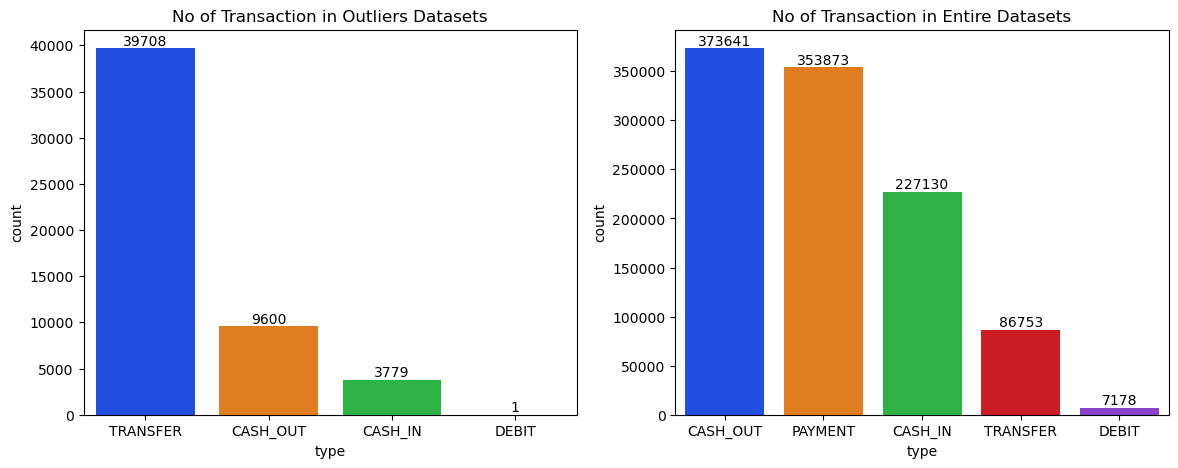

In [67]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=outliers,x=outliers['type'],palette='bright')
for i,value in enumerate (outliers['type'].value_counts()):
    plt.text(i,value,s=value,ha='center',color='black',va='bottom')

plt.title('No of Transaction in Outliers Datasets')
plt.subplot(1,2,2)
sns.countplot(data=fraud_2,x=fraud_2['type'],order=fraud_2['type'].value_counts().index,palette='bright')
for i,item in enumerate(fraud_2['type'].value_counts()):
    plt.text(i,item,s=item,ha='center',va='bottom')

plt.title('No of Transaction in Entire Datasets')
plt.show()

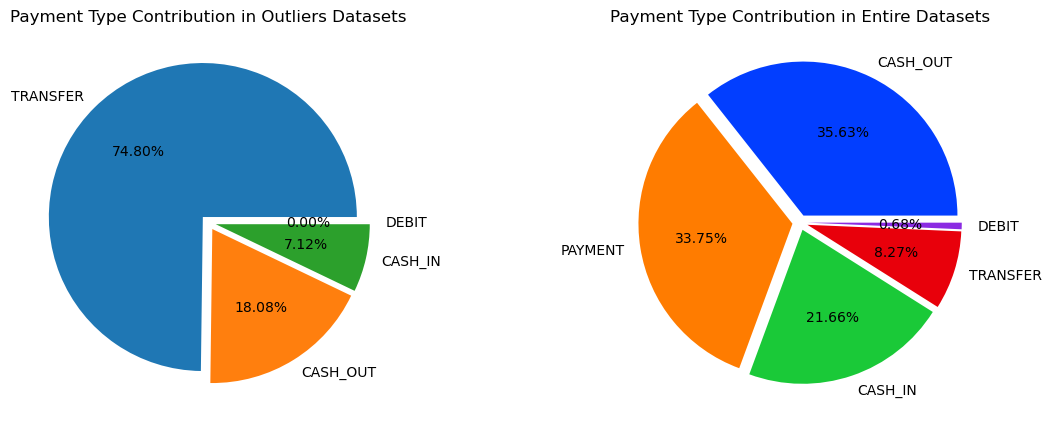

In [71]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(x=outliers['type'].value_counts(),explode=len(outliers['type'].value_counts())*[0.05],autopct='%1.2f%%',labels=outliers['type'].value_counts().index)
plt.title('Payment Type Contribution in Outliers Datasets')
plt.subplot(1,2,2)
plt.pie(x=fraud_2['type'].value_counts(),explode=len(fraud_2['type'].value_counts())*[0.05],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=fraud_2['type'].value_counts().index)
plt.title('Payment Type Contribution in Entire Datasets')
plt.show()

### type_agg

In [73]:
type_agg = fraud_2.groupby(by='type').agg({'amount':'sum'}).reset_index()

In [75]:
type_agg.head()

,type,amount
0,CASH_IN,3.859476e+10
1,CASH_OUT,6.876474e+10
2,DEBIT,4.219599e+07
3,PAYMENT,3.936097e+09
4,TRANSFER,5.503644e+10


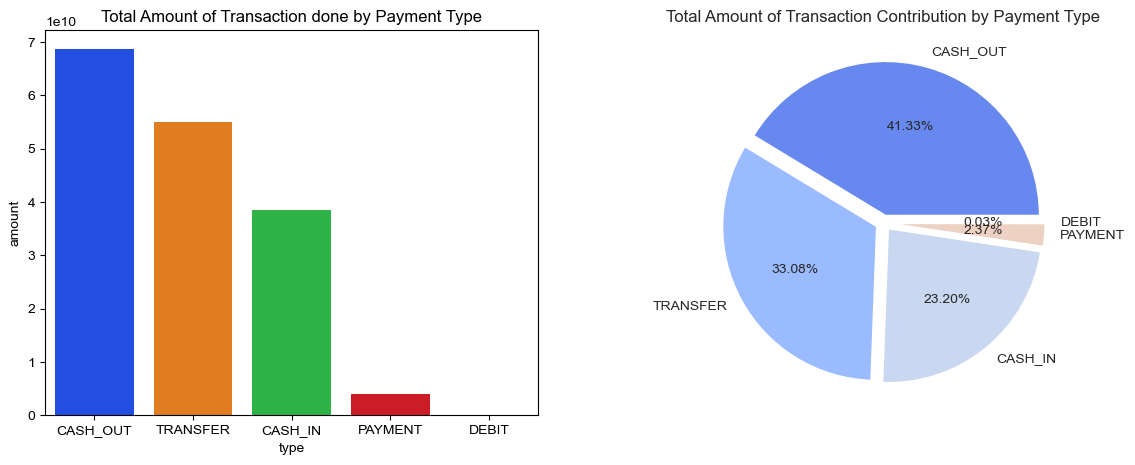

In [77]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=type_agg.sort_values(by='amount',ascending=False),x='type',y='amount',palette='bright')
sns.set_style('dark')
plt.title('Total Amount of Transaction done by Payment Type')
plt.subplot(1,2,2)
plt.pie(x=type_agg.sort_values(by='amount',ascending=False)['amount'],explode=len(type_agg.sort_values(by='amount',ascending=False)['amount'])*[0.05],colors=sns.color_palette('coolwarm'),autopct='%1.2f%%',labels=type_agg.sort_values(by='amount',ascending=False)['type'])
plt.title('Total Amount of Transaction Contribution by Payment Type')
plt.show()

### fraud_3

In [79]:
fraud_3 = fraud_2.copy()

In [81]:
fraud_3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [83]:
# Used apply and lambda function to differente in between Customer and Merchant Type Transaction
# Starting with C of nameorig is known as the Customer and
# Starting with M of nameorig is known as the Merchant


fraud_3.insert(loc=4,column='type_orig',value=fraud_3['nameOrig'].apply(lambda x : 'Customer' if x.startswith('C') else 'Merchant'))

In [85]:
fraud_3.insert(loc=8,column='type_dest',value=fraud_3['nameDest'].apply(lambda x: 'Merchant' if x.startswith('M') else 'Customer'))

In [87]:
fraud_3.head()

,step,type,amount,nameOrig,type_orig,oldbalanceOrg,newbalanceOrig,nameDest,type_dest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,Customer,170136.0,160296.36,M1979787155,Merchant,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,Customer,21249.0,19384.72,M2044282225,Merchant,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,Customer,181.0,0.00,C553264065,Customer,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,Customer,181.0,0.00,C38997010,Customer,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,Customer,41554.0,29885.86,M1230701703,Merchant,0.0,0.0,0


### Data Preprocessing and Label Encoding

In [89]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
fraud_2['type'] = le.fit_transform(fraud_2['type'])

In [93]:
# in the Label Encoding Function, we can giving a unique number of each categorical data in Alphabetical Wise
# To Identifying the Type Name of the Item gothrough to type_agg DataFrame

fraud_2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [95]:
#type_agg.head()

### Build Correlation Between Columns

In [97]:
correlation = fraud_2[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]

In [99]:
correlation = correlation.corr()

In [101]:
correlation

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.015992,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
type,0.015992,1.000000,0.042118,-0.339142,-0.351602,-0.166134,-0.127108,0.018859
amount,-0.025996,0.042118,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,-0.339142,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.351602,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,-0.166134,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,-0.127108,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.018859,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


### Plot HeatMap Graph

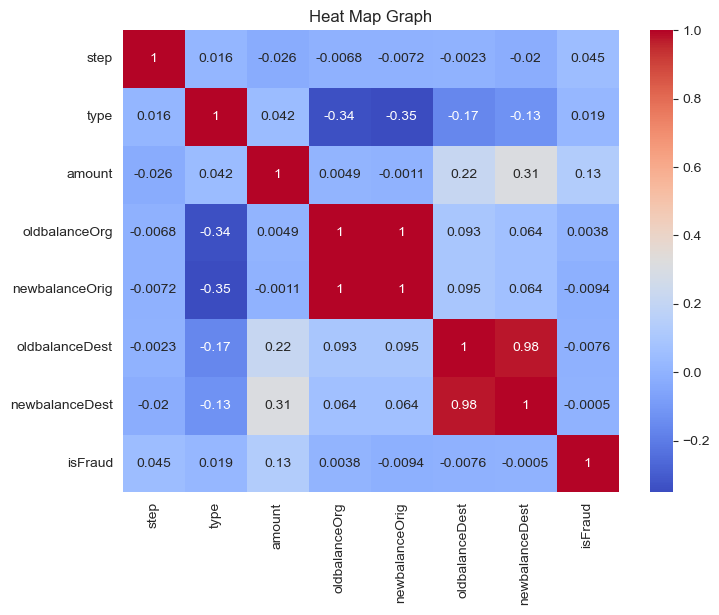

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation,annot=True,cmap='coolwarm')
plt.title('Heat Map Graph')
plt.show()

<Axes: xlabel='oldbalanceOrg', ylabel='amount'>

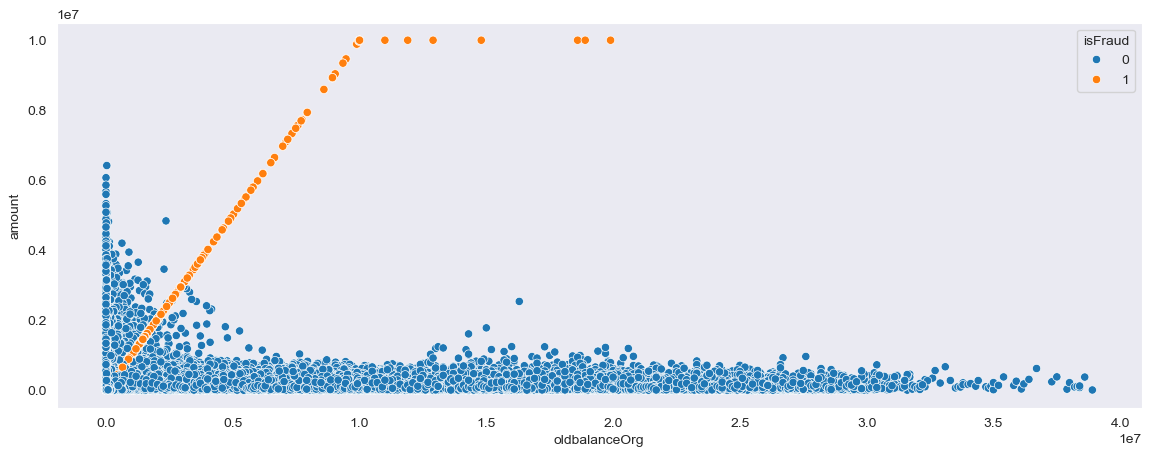

In [105]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=fraud_3,x=fraud_3['oldbalanceOrg'],y=fraud_3['amount'],hue=fraud_3['isFraud'])

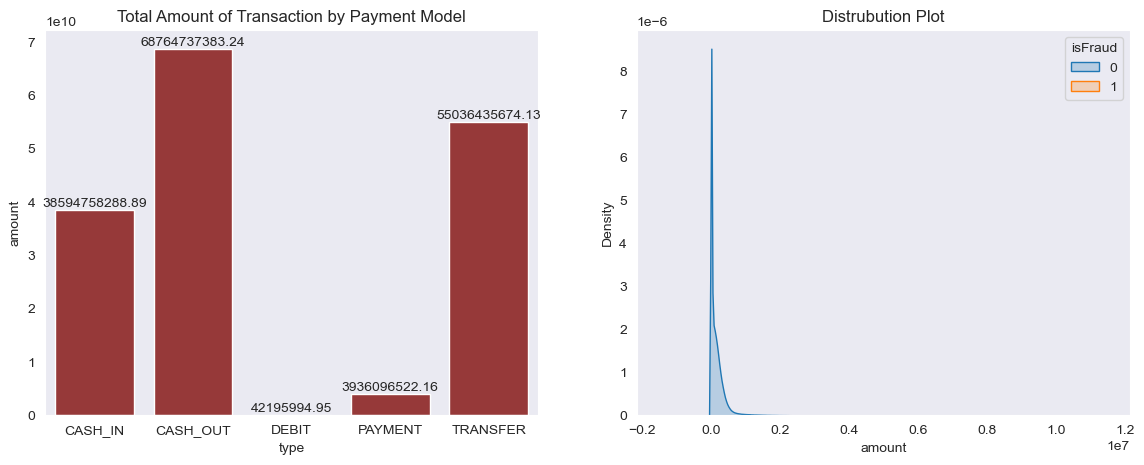

In [115]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=type_agg,x=type_agg['type'],y=type_agg['amount'],color='brown')
for i,item in enumerate(type_agg['amount']):
    plt.text(i,item,s=item,ha='center',va='bottom')

plt.title('Total Amount of Transaction by Payment Model')
plt.subplot(1,2,2)
sns.kdeplot(data=fraud_3,x=fraud_3['amount'],hue=fraud_3['isFraud'],fill=True)
plt.title('Distrubution Plot')
plt.show()

# Fraud Analysis

In [117]:
fraud_yes = fraud_3[fraud_3['isFraud'] == 1]

In [119]:
fraud_no = fraud_3[fraud_3['isFraud'] == 0]

### fraud_yes Data Frame

In [121]:
fraud_yes.head()

,step,type,amount,nameOrig,type_orig,oldbalanceOrg,newbalanceOrig,nameDest,type_dest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.0,C1305486145,Customer,181.0,0.0,C553264065,Customer,0.0,0.0,1
3,1,CASH_OUT,181.0,C840083671,Customer,181.0,0.0,C38997010,Customer,21182.0,0.0,1
251,1,TRANSFER,2806.0,C1420196421,Customer,2806.0,0.0,C972765878,Customer,0.0,0.0,1
252,1,CASH_OUT,2806.0,C2101527076,Customer,2806.0,0.0,C1007251739,Customer,26202.0,0.0,1
680,1,TRANSFER,20128.0,C137533655,Customer,20128.0,0.0,C1848415041,Customer,0.0,0.0,1


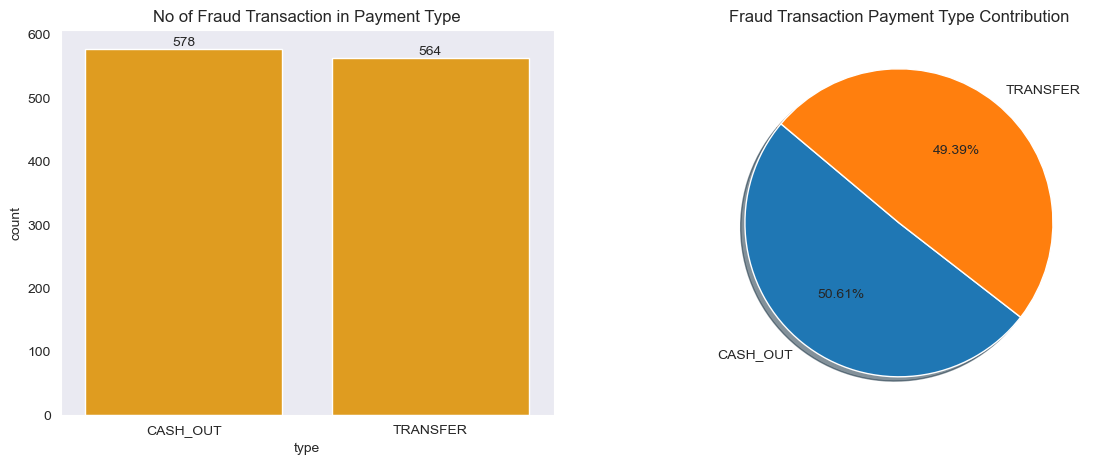

In [125]:
# The Maximum Number of Fraud Transaction detected by Cash_out Payment Type

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=fraud_yes,x=fraud_yes['type'],color='orange',order=fraud_yes['type'].value_counts().index)
for i,item in enumerate(fraud_yes['type'].value_counts()):
    plt.text(i,item,s=item,ha='center',va='bottom')

plt.title('No of Fraud Transaction in Payment Type')
plt.subplot(1,2,2)
plt.pie(x=fraud_yes['type'].value_counts(),shadow=True,startangle=140,autopct='%1.2f%%',labels=fraud_yes['type'].value_counts().index)
plt.title('Fraud Transaction Payment Type Contribution')
plt.show()

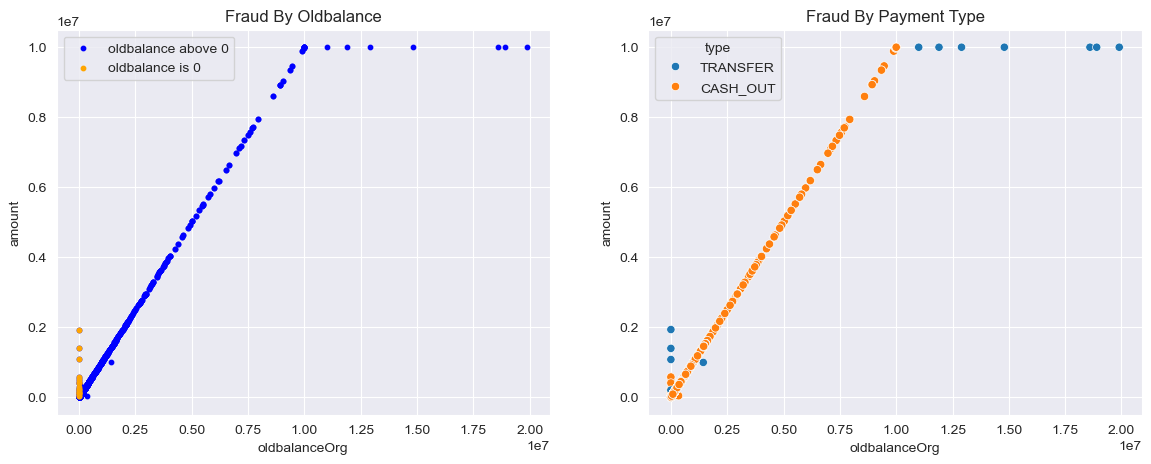

In [127]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.xlabel('oldbalanceOrg')
plt.ylabel('amount')
plt.scatter(data=fraud_yes,x='oldbalanceOrg',y='amount',color='blue',s=10,label='oldbalance above 0')
plt.scatter(data=fraud_yes[fraud_yes['oldbalanceOrg'] == 0],x='oldbalanceOrg',y='amount',color='orange',s=10,label='oldbalance is 0')
plt.legend()
plt.grid()
plt.title('Fraud By Oldbalance')
plt.subplot(1,2,2)
sns.scatterplot(data=fraud_yes,x=fraud_yes['oldbalanceOrg'],y=fraud_yes['amount'],hue=fraud_yes['type'])
plt.grid()
plt.title('Fraud By Payment Type')
plt.show()

# The Minimun Fraud Amount is 119 and 
# The Maximum Fraud Amount is 10000000

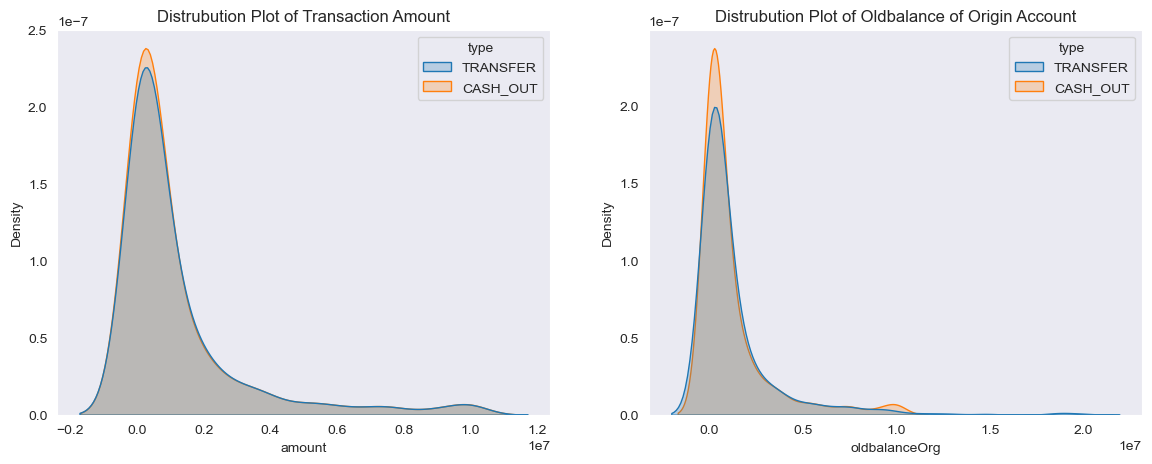

In [129]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.kdeplot(data=fraud_yes,x=fraud_yes['amount'],hue=fraud_yes['type'],fill=True)
plt.title('Distrubution Plot of Transaction Amount')
plt.subplot(1,2,2)
sns.kdeplot(data=fraud_yes,x=fraud_yes['oldbalanceOrg'],hue=fraud_yes['type'],fill=True)
plt.title('Distrubution Plot of Oldbalance of Origin Account')
plt.show()

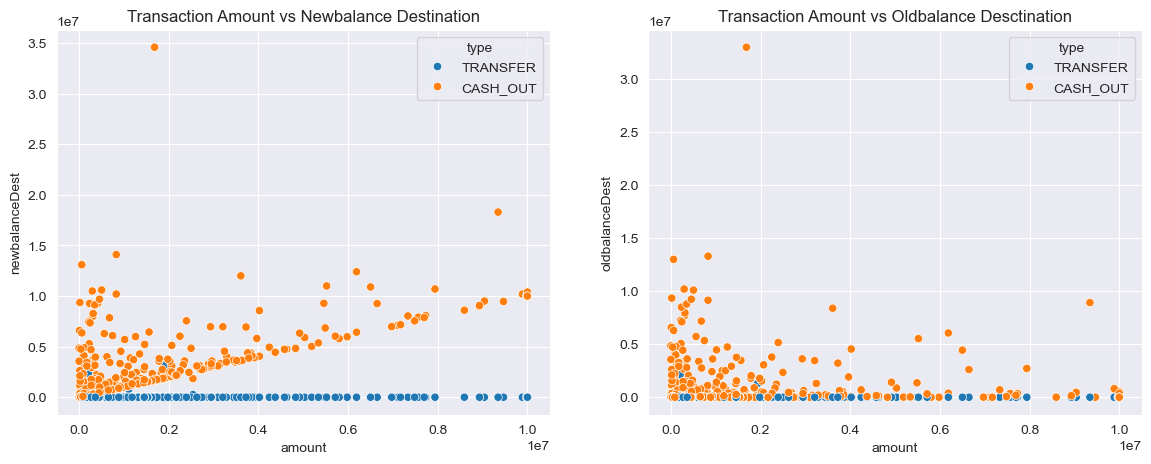

In [131]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=fraud_yes,x=fraud_yes['amount'],y=fraud_yes['newbalanceDest'],hue=fraud_yes['type'])
plt.grid()
plt.title('Transaction Amount vs Newbalance Destination')
plt.subplot(1,2,2)
sns.scatterplot(data=fraud_yes,x=fraud_yes['amount'],y=fraud_yes['oldbalanceDest'],hue=fraud_yes['type'])
plt.grid()
plt.title('Transaction Amount vs Oldbalance Desctination')
plt.show()

### fraud_no Data Frame

In [133]:
fraud_no.head()

,step,type,amount,nameOrig,type_orig,oldbalanceOrg,newbalanceOrig,nameDest,type_dest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,Customer,170136.0,160296.36,M1979787155,Merchant,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,Customer,21249.0,19384.72,M2044282225,Merchant,0.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,Customer,41554.0,29885.86,M1230701703,Merchant,0.0,0.0,0
5,1,PAYMENT,7817.71,C90045638,Customer,53860.0,46042.29,M573487274,Merchant,0.0,0.0,0
6,1,PAYMENT,7107.77,C154988899,Customer,183195.0,176087.23,M408069119,Merchant,0.0,0.0,0


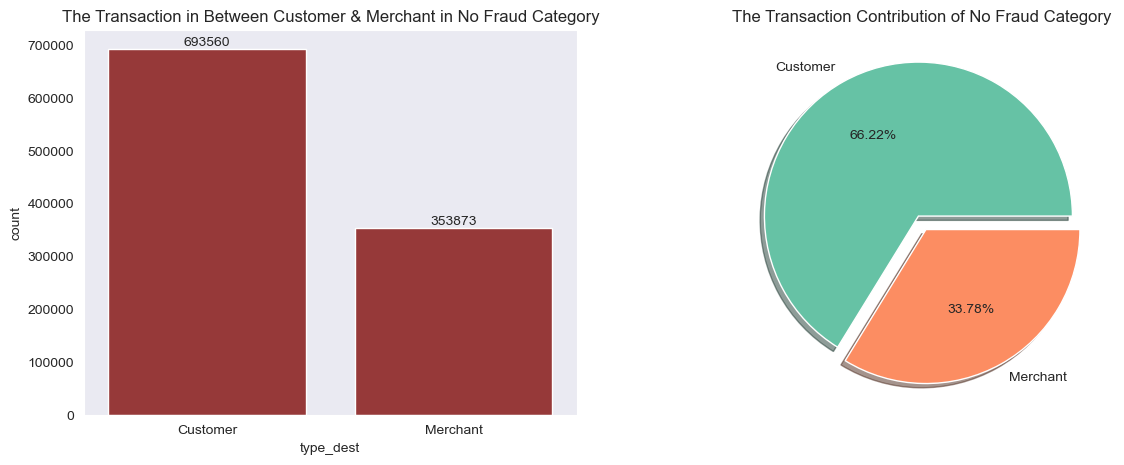

In [135]:
# The maximum Transaction are done inbetween of Customer-Customer as Compare to Customer-Merchant

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=fraud_no,x=fraud_no['type_dest'],color='brown',order=fraud_no['type_dest'].value_counts().index)
for i,type in enumerate(fraud_no['type_dest'].value_counts()):
    plt.text(i,type,s=type,ha='center',va='bottom')

plt.title('The Transaction in Between Customer & Merchant in No Fraud Category')
plt.subplot(1,2,2)
plt.pie(x=fraud_no['type_dest'].value_counts(),explode=len(fraud_no['type_dest'].value_counts())*[0.05],shadow=True,colors=sns.color_palette('Set2'),autopct='%1.2f%%',labels=fraud_no['type_dest'].value_counts().index)
plt.title('The Transaction Contribution of No Fraud Category')
plt.show()

### nameorig_agg

In [139]:
nameorig_agg = fraud_3.groupby(by='nameOrig').agg({'amount':'sum','oldbalanceOrg':'sum','newbalanceOrig':'sum'}).reset_index()

In [140]:
nameorig_agg.head()

,nameOrig,amount,oldbalanceOrg,newbalanceOrig
0,C1000001725,8424.74,783.00,0.00
1,C1000004530,93865.13,351422.72,257557.59
2,C1000008582,315626.96,0.00,0.00
3,C1000009135,3849.38,103120.55,99271.17
4,C1000012640,367527.28,0.00,0.00


### Data Preprocessing and LabelEncoding

In [143]:
fraud_4 = fraud_3.copy()

In [145]:
fraud_4.head()

,step,type,amount,nameOrig,type_orig,oldbalanceOrg,newbalanceOrig,nameDest,type_dest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,Customer,170136.0,160296.36,M1979787155,Merchant,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,Customer,21249.0,19384.72,M2044282225,Merchant,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,Customer,181.0,0.00,C553264065,Customer,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,Customer,181.0,0.00,C38997010,Customer,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,Customer,41554.0,29885.86,M1230701703,Merchant,0.0,0.0,0


In [147]:
from sklearn import preprocessing

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [151]:
# We can get Payment Type Unique Number From type_agg

fraud_4['type'] = le.fit_transform(fraud_4['type'])

In [153]:
fraud_4['type_orig'] = le.fit_transform(fraud_4['type_orig'])

In [155]:
# The Customer Unique Number is 0 and Merchant Unique Number is 1

fraud_4['type_dest'] = le.fit_transform(fraud_4['type_dest'])

### Feature Engineering

In [157]:
fraud_4.drop(columns='nameOrig',inplace=True)

In [159]:
fraud_4.drop(columns='nameDest',inplace=True)

# Model Selection

# Logistics Regression

### Defined Features (x) and Target (y) Variables

In [622]:
x = fraud_4[['step','type','amount','type_orig','oldbalanceOrg','newbalanceOrig','type_dest','oldbalanceDest','newbalanceDest']]

In [623]:
y = fraud_4['isFraud']

### Import Train-Test-Split Model

In [625]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=7698)

### Import Logistic Regression From Sciket-Learn

In [627]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

### Train and Fit the Model

In [629]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [630]:
lr.intercept_

array([-7.87151885])

In [631]:
lr.coef_

array([[ 4.76637683e-02,  2.01107749e-01, -1.95262854e-05,
         0.00000000e+00,  3.01631091e-05, -4.15699397e-05,
        -1.47446888e+00,  2.25547457e-06, -2.55952812e-06]])

### Model Predict

In [633]:
# The Shape of y_lr_pred and the y_test will be the Same

y_lr_pred =  lr.predict(x_test)

In [634]:
y_lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation and Accuracy

In [636]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [637]:
# The Accuracy Score of the model is 99%

accuracy_score(y_test,y_lr_pred)

0.9993095397949219

In [638]:
lr_report = classification_report(y_test,y_lr_pred)

In [639]:
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       0.86      0.42      0.57       280

    accuracy                           1.00    262144
   macro avg       0.93      0.71      0.78    262144
weighted avg       1.00      1.00      1.00    262144



In [640]:
confusion_matrix(y_test,y_lr_pred)

# True Negative 261844
# True Positive 119
# False Negative 161
# False Positive 20

array([[261844,     20],
       [   161,    119]], dtype=int64)

### Testing New DataFrame 

In [642]:
testing =  x_test.copy()

In [643]:
testing.insert(loc=9,column='Actual Predict',value=y_test)

In [644]:
testing.insert(loc=10,column='Logistic Regression Predict',value=y_lr_pred)

In [645]:
#testing[(testing['Actual Predict'] == 0) & (testing['Logistic Regression Predict'] == 1)].shape

In [646]:
testing.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,Actual Predict,Logistic Regression Predict
991673,45,1,62326.80,0,41772.00,0.00,0,103818.69,166145.49,0,0
635879,35,3,4348.70,0,141011.00,136662.30,1,0.00,0.00,0,0
76511,10,3,10258.59,0,164989.00,154730.41,1,0.00,0.00,0,0
387154,17,4,967120.80,0,0.00,0.00,0,1581872.35,2325129.42,0,0
391501,17,1,46185.19,0,3612.31,0.00,0,0.00,46185.19,0,0


# Random Forest Classification Algorithms

In [648]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_leaf_nodes=10)

### Model Train & Fit

In [650]:
rc.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=10)

### Model Predict

In [652]:
y_rc_pred = rc.predict(x_test)

In [653]:
y_rc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation & Accuracy

In [655]:
accuracy_score(y_test,y_rc_pred)

0.9994239807128906

In [656]:
rfc_report = classification_report(y_test,y_rc_pred)

In [657]:
print(rfc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       1.00      0.46      0.63       280

    accuracy                           1.00    262144
   macro avg       1.00      0.73      0.82    262144
weighted avg       1.00      1.00      1.00    262144



In [658]:
confusion_matrix(y_test,y_rc_pred)

# True Negative 261864
# True Positive 116
# False Negative 164
# False Positive 0

array([[261864,      0],
       [   151,    129]], dtype=int64)

### Testing DataFrame

In [660]:
testing.insert(loc=11,column='Random Forest Predict',value=y_rc_pred)

In [661]:
testing.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,Actual Predict,Logistic Regression Predict,Random Forest Predict
991673,45,1,62326.80,0,41772.00,0.00,0,103818.69,166145.49,0,0,0
635879,35,3,4348.70,0,141011.00,136662.30,1,0.00,0.00,0,0,0
76511,10,3,10258.59,0,164989.00,154730.41,1,0.00,0.00,0,0,0
387154,17,4,967120.80,0,0.00,0.00,0,1581872.35,2325129.42,0,0,0
391501,17,1,46185.19,0,3612.31,0.00,0,0.00,46185.19,0,0,0


# Decision Tree Classification Algorithms

In [663]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc = DecisionTreeClassifier(max_leaf_nodes=10)

### Model Train & Fit

In [665]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

### Model Predict

In [667]:
y_dtc_pred = dtc.predict(x_test)

In [668]:
y_dtc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation & Accuracy

In [670]:
accuracy_score(y_test,y_dtc_pred)

0.9994621276855469

In [671]:
dtc_report = classification_report(y_test,y_dtc_pred)

In [672]:
print(dtc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       1.00      0.50      0.66       280

    accuracy                           1.00    262144
   macro avg       1.00      0.75      0.83    262144
weighted avg       1.00      1.00      1.00    262144



In [673]:
confusion_matrix(y_test,y_dtc_pred)

# True Negative 261864
# True Positivs 139
# False Negative 141
# False Positive 0

array([[261864,      0],
       [   141,    139]], dtype=int64)

### Testing DataFrame

In [675]:
testing.insert(loc=12,column='Decision Tree Predict',value=y_dtc_pred)

In [676]:
testing.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,Actual Predict,Logistic Regression Predict,Random Forest Predict,Decision Tree Predict
991673,45,1,62326.80,0,41772.00,0.00,0,103818.69,166145.49,0,0,0,0
635879,35,3,4348.70,0,141011.00,136662.30,1,0.00,0.00,0,0,0,0
76511,10,3,10258.59,0,164989.00,154730.41,1,0.00,0.00,0,0,0,0
387154,17,4,967120.80,0,0.00,0.00,0,1581872.35,2325129.42,0,0,0,0
391501,17,1,46185.19,0,3612.31,0.00,0,0.00,46185.19,0,0,0,0


### New DataFrame fraud_5

In [678]:
fraud_5 = fraud_3[['step','type','amount','type_orig','oldbalanceOrg','newbalanceOrig','type_dest','oldbalanceDest','newbalanceDest','isFraud']]

In [679]:
fraud_5.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,Customer,170136.0,160296.36,Merchant,0.0,0.0,0
1,1,PAYMENT,1864.28,Customer,21249.0,19384.72,Merchant,0.0,0.0,0
2,1,TRANSFER,181.00,Customer,181.0,0.00,Customer,0.0,0.0,1
3,1,CASH_OUT,181.00,Customer,181.0,0.00,Customer,21182.0,0.0,1
4,1,PAYMENT,11668.14,Customer,41554.0,29885.86,Merchant,0.0,0.0,0


### Plot Tree Map

In [681]:
from sklearn import tree

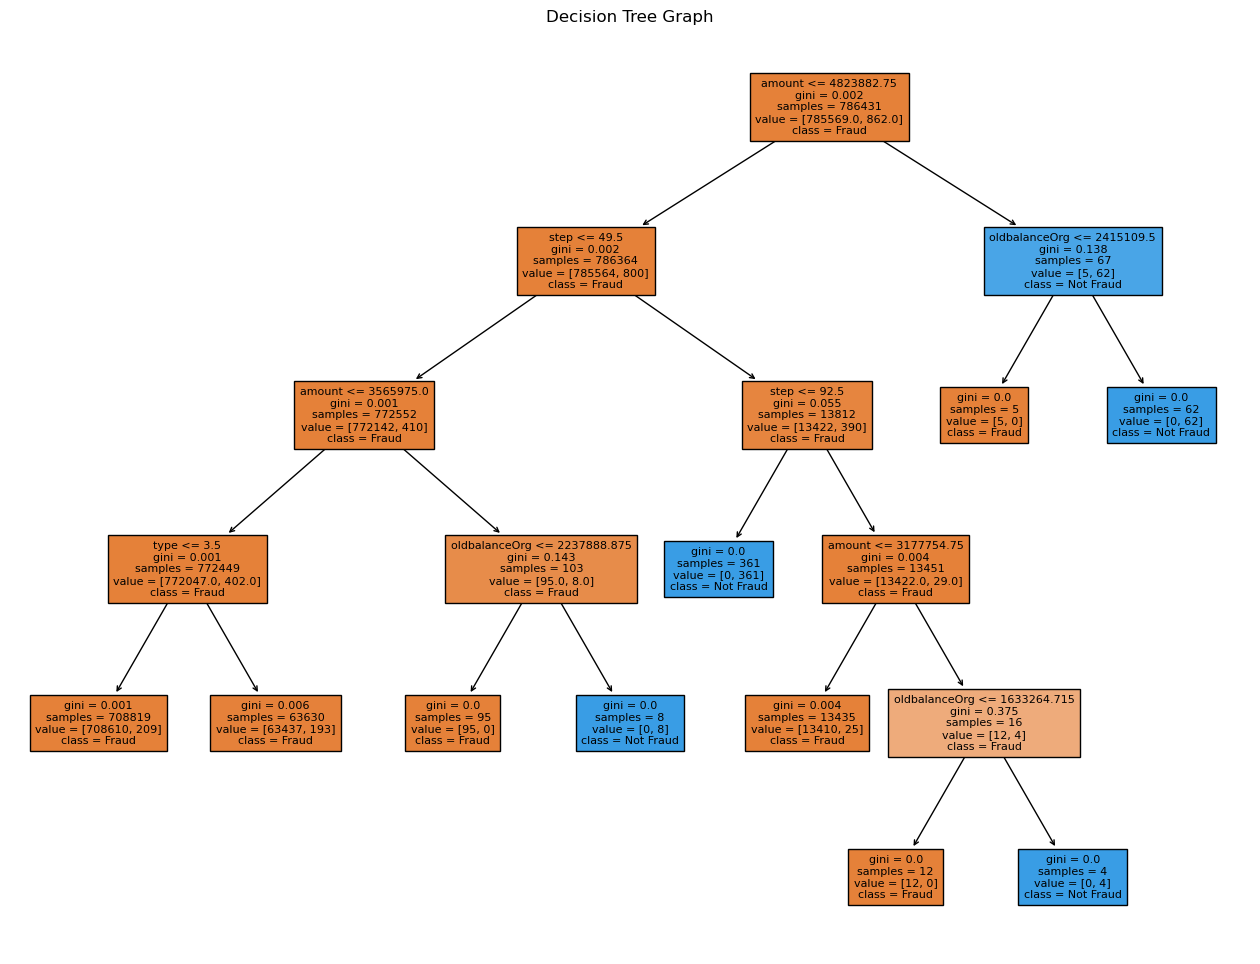

In [837]:
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree=dtc,feature_names=fraud_5.columns,class_names=['Fraud','Not Fraud'],filled=True,impurity=True,fontsize=8)
plt.title('Decision Tree Graph')
plt.show()

# Gradient Boosting Algorithms

In [684]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_leaf_nodes=10)

### Train & Fit Model

In [686]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=10)

### Model Predict

In [688]:
y_gbc_pred = gbc.predict(x_test)

In [689]:
y_gbc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation And Accuracy

In [691]:
accuracy_score(y_test,y_gbc_pred)

0.9991989135742188

In [692]:
gbc_report = classification_report(y_test,y_gbc_pred)

In [693]:
print(gbc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       0.93      0.27      0.42       280

    accuracy                           1.00    262144
   macro avg       0.96      0.64      0.71    262144
weighted avg       1.00      1.00      1.00    262144



In [694]:
confusion_matrix(y_test,y_gbc_pred)

# True Negative 261858
# True Positive 76
# False Negative 204
# False Positive 6

array([[261858,      6],
       [   204,     76]], dtype=int64)

### Testing DataFrame

In [696]:
testing.insert(loc=13,column='Gradient Boosting Predict',value=y_gbc_pred)

In [697]:
testing.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,Actual Predict,Logistic Regression Predict,Random Forest Predict,Decision Tree Predict,Gradient Boosting Predict
991673,45,1,62326.80,0,41772.00,0.00,0,103818.69,166145.49,0,0,0,0,0
635879,35,3,4348.70,0,141011.00,136662.30,1,0.00,0.00,0,0,0,0,0
76511,10,3,10258.59,0,164989.00,154730.41,1,0.00,0.00,0,0,0,0,0
387154,17,4,967120.80,0,0.00,0.00,0,1581872.35,2325129.42,0,0,0,0,0
391501,17,1,46185.19,0,3612.31,0.00,0,0.00,46185.19,0,0,0,0,0


# Extreme Gradient Boosting Algorithms

In [839]:
import xgboost as xgb

In [849]:
from xgboost import XGBClassifier,plot_tree
xgb = XGBClassifier()

### Model Train & Fit

In [852]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Predict

In [878]:
y_xgb_pred = xgb.predict(x_test)

In [882]:
y_xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

### Model Evaluation & Accuracy

In [862]:
accuracy_score(y_test,y_xbg_pred)

0.9998283386230469

In [872]:
xgb_report = classification_report(y_test,y_xbg_pred)

In [874]:
print(xgb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       0.98      0.85      0.91       280

    accuracy                           1.00    262144
   macro avg       0.99      0.93      0.96    262144
weighted avg       1.00      1.00      1.00    262144



In [886]:
confusion_matrix(y_test,y_xgb_pred)

# True Negative 261860
# True Positive 239
# False Negative 41
# False Positive 4

array([[261860,      4],
       [    41,    239]], dtype=int64)

### Testing New DataFrame

In [941]:
testing.insert(loc=14,column='XGBoosting Predict',value=y_xgb_pred)

In [943]:
testing.head()

,step,type,amount,type_orig,oldbalanceOrg,newbalanceOrig,type_dest,oldbalanceDest,newbalanceDest,Actual Predict,Logistic Regression Predict,Random Forest Predict,Decision Tree Predict,Gradient Boosting Predict,XGBoosting Predict
991673,45,1,62326.80,0,41772.00,0.00,0,103818.69,166145.49,0,0,0,0,0,0
635879,35,3,4348.70,0,141011.00,136662.30,1,0.00,0.00,0,0,0,0,0,0
76511,10,3,10258.59,0,164989.00,154730.41,1,0.00,0.00,0,0,0,0,0,0
387154,17,4,967120.80,0,0.00,0.00,0,1581872.35,2325129.42,0,0,0,0,0,0
391501,17,1,46185.19,0,3612.31,0.00,0,0.00,46185.19,0,0,0,0,0,0


# Project Conclusion Report

In [974]:
print(dtc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       1.00      0.50      0.66       280

    accuracy                           1.00    262144
   macro avg       1.00      0.75      0.83    262144
weighted avg       1.00      1.00      1.00    262144



In [984]:
confusion_matrix(y_test,y_dtc_pred)

array([[261864,      0],
       [   141,    139]], dtype=int64)

The Decision Tree Algorithms is the Best Fit Model, Because of there are not any False Positive and Minimun Numbers of Data Points are in False Negative as Compared to Other Machine Learning Model

# Thank You